# Introduction

In this exercise, we will be analyzing 400 tweets, 200 each from 2 users.

## Twitter Authentication

Set up authentication to extract tweets using the api keys and access tokens generated in your twitter developer account.

Code Reference: 
http://docs.tweepy.org/en/v3.5.0/auth_tutorial.html;

In [0]:
import tweepy as tp

consumer_api_key = '#####'
consumer_api_secret_key = '#####'
access_token = '#####'
access_token_secret = '#####'

auth = tp.OAuthHandler(consumer_api_key, consumer_api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth)

## Extract Tweets

There is a straight forward option to extract 200 tweets from a user using the **user_timeline** function but it only provides the most recent tweets which might not provide accurate insights into the user behaviour. A random sample of 200 tweets from no particuar time period will enable accurate analysis of the users.

Since Twitter allows to extract around 3,200 tweets from each user, lets go ahead and extract as many tweets as possible using the functions **Cursor** and **user_timeline**. We will also be ignoring all types of retweets from the users.

Code Reference: http://docs.tweepy.org/en/v3.5.0/cursor_tutorial.html; http://docs.tweepy.org/en/v3.5.0/api.html; https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline;



In [2]:
tweets1 = []
tweets2 = []

for i in tp.Cursor(api.user_timeline, screen_name = 'simongerman600', include_rts = False).items():
  tweets1.append(i)
  
for j in tp.Cursor(api.user_timeline, screen_name = 'Acosta', include_rts = False).items():
  tweets2.append(j)
  
print(tweets1[0])
print(tweets2[0])

Status(_api=<tweepy.api.API object at 0x7fabce964c88>, _json={'created_at': 'Tue Mar 03 11:22:03 +0000 2020', 'id': 1234801204460490754, 'id_str': '1234801204460490754', 'text': 'Realistic clouds and 3D terrain added to old paper maps by @geo_spatialist. We see the Yellowstone National Park ma… https://t.co/EKygQwDY7p', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'geo_spatialist', 'name': 'Sean Conway', 'id': 1211798212253601792, 'id_str': '1211798212253601792', 'indices': [59, 74]}], 'urls': [{'url': 'https://t.co/EKygQwDY7p', 'expanded_url': 'https://twitter.com/i/web/status/1234801204460490754', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://buffer.com" rel="nofollow">Buffer</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 359188534, 'id_str': '359

(1) Simon Kuestenmacher is a geographer and demographer living in Melbourne who shares maps and visualizations.

(2) Jim Acosta is a White House correspondent for CNN

## Tweets to Dataframes
In this link https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object, we can see the range of data that we extract along with the tweets.

Since we will only be dealing with posting times, pictures, links, hashtags and texts in this analysis, we  will extract the necessary information such as *id_str*; *created_at*; *text*; *screen_name* under *user*; *hashtags*, *urls* and *media* under *entities*; and append each of them first to separate lists and later store them in dataframes.

Code Reference: https://stackoverflow.com/questions/12791501/python-initializing-a-list-of-lists; https://stackoverflow.com/questions/54644722/how-to-vertically-align-lists-to-pandas-dataframe-in-python;

In [3]:
import pandas as pd
import numpy as np

lists1 = [[] for _ in range(7)]
lists2 = [[] for _ in range(7)] # list of lists

def dfs(tweets_list, lists):
  
  for i in tweets_list:
    lists[0].append(i.user.screen_name)
    lists[1].append(str(i.created_at)) # appending as string to avoid datetime.datetime format
    lists[2].append(i.id_str)
    lists[3].append(i.text)
    lists[4].append(len(i.entities['hashtags']))
    lists[5].append(len(i.entities['urls'])) 
    try:
      lists[6].append(len(i.entities['media'])) # appending counts of hashtags, urls and media
    except:
      lists[6].append(0) 
      # exception handling introduced as media object is available in json structure only when the tweet has media content
    
  df = pd.DataFrame(np.column_stack(lists), columns=['screen_name','created_at','id_str','text','hashtags','urls','media'])
  return(df) # create a dataframe out of the list of lists

tweets_df1 = dfs(tweets1, lists1)
tweets_df2 = dfs(tweets2, lists2)

print('tweets_df1 :', len(tweets_df1),': tweets_df2 :', len(tweets_df2))
print(tweets_df1.head())
print(tweets_df2.tail())

tweets_df1 : 1516 : tweets_df2 : 1557
      screen_name           created_at               id_str  ... hashtags urls media
0  simongerman600  2020-03-03 11:22:03  1234801204460490754  ...        0    1     0
1  simongerman600  2020-03-03 09:01:01  1234765714894073857  ...        0    1     0
2  simongerman600  2020-03-02 21:03:02  1234585025741500416  ...        0    1     0
3  simongerman600  2020-03-02 19:29:02  1234561370496040967  ...        0    1     0
4  simongerman600  2020-03-02 18:04:05  1234539993294655489  ...        0    1     1

[5 rows x 7 columns]
     screen_name           created_at               id_str  ... hashtags urls media
1552      Acosta  2018-11-19 20:59:40  1064624269206917120  ...        0    0     0
1553      Acosta  2018-11-19 19:30:36  1064601855848849410  ...        0    1     0
1554      Acosta  2018-11-18 20:02:26  1064247478344720384  ...        0    1     0
1555      Acosta  2018-11-11 10:06:48  1061560866481401856  ...        0    1     0
1556      

## Sampling Tweets

A random sample of 200 tweets is taken from both sets of tweets for further analysis.

Code Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html; https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas;

In [4]:
tweets_df1 = tweets_df1.sample(200, random_state = 0)
tweets_df2 = tweets_df2.sample(200, random_state = 0)                                          
# random sampling

tweets_df1 = tweets_df1.astype({"hashtags": int, "urls": int, "media": int})
tweets_df2 = tweets_df2.astype({"hashtags": int, "urls": int, "media": int}) 
# change type of columns to integer

print('tweets_df1 :', len(tweets_df1),': tweets_df2 :', len(tweets_df2))
print(tweets_df1.tail())
print(tweets_df2.head())

tweets_df1 : 200 : tweets_df2 : 200
         screen_name           created_at  ... urls media
539   simongerman600  2019-12-27 21:00:04  ...    1     0
693   simongerman600  2019-12-09 10:00:06  ...    1     0
1378  simongerman600  2019-09-06 14:50:03  ...    1     1
399   simongerman600  2020-01-13 16:50:01  ...    1     0
435   simongerman600  2020-01-08 17:35:03  ...    1     0

[5 rows x 7 columns]
     screen_name           created_at  ... urls media
319       Acosta  2019-11-26 19:30:05  ...    0     1
1264      Acosta  2019-02-12 15:22:35  ...    1     0
798       Acosta  2019-06-29 19:24:44  ...    1     0
579       Acosta  2019-09-24 14:13:13  ...    1     0
414       Acosta  2019-11-05 18:08:51  ...    0     1

[5 rows x 7 columns]


## Analysis of Posting Times
In this section, we will be analyzing and comparing the tweet posting times of both users on an hourly basis.

Lets strip the hours from *created_at* and store them in a separate column to find the percentage of tweets per hour, for both the dataframes.

Code Reference: https://stackoverflow.com/questions/7999935/python-datetime-to-string-without-microsecond-component;  https://stackoverflow.com/questions/50558458/pandas-percentage-by-value-in-a-column; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html; https://stackoverflow.com/questions/12700311/how-to-fill-a-dict-with-none-for-all-keys-given-in-a-list-in-python-3-3;

In [0]:
tweets_df1['hour'] = (tweets_df1.apply(lambda x: x.created_at[11:13], axis=1)).astype(int)
tweets_df2['hour'] = (tweets_df2.apply(lambda x: x.created_at[11:13], axis=1)).astype(int)
# strip the hours from created_at and store in a separate column

percentages1 = (tweets_df1['hour'].value_counts(normalize=True)*100).sort_index()
percentages2 = (tweets_df2['hour'].value_counts(normalize=True)*100).sort_index()
# find percentages of tweets per hour

dict1 = {key: 0 for key in range(0,25)}
dict2 = {key: 0 for key in range(0,25)}
# create empty dictionaries with keys as hours from 0 to 24

dict1.update(percentages1)
dict2.update(percentages2)
# update dictionaries with the percentages stored in series

Plot the percentages of tweets in y-axis and the hours in x-axis for both the users.

Code Reference: https://stackoverflow.com/questions/43431347/python-dictionary-plot-matplotlib

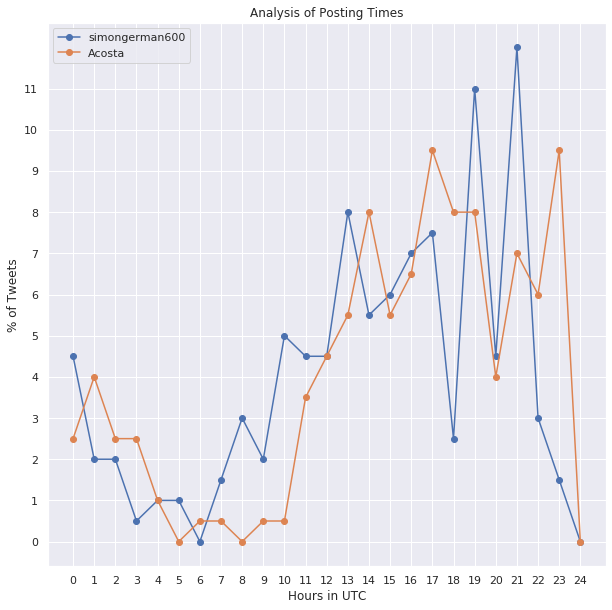

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(10,10))

plt.plot(list(dict1.keys()),list(dict1.values()), marker='o', label='simongerman600')
plt.plot(list(dict2.keys()),list(dict2.values()), marker='o', label='Acosta') # plotting dictionaries

plt.xticks(np.arange(0,25))
plt.yticks(np.arange(0,12)) # setting axis intervals
plt.xlabel('Hours in UTC')
plt.ylabel('% of Tweets')
plt.title('Analysis of Posting Times')
plt.legend(loc='best')

plt.show()

It is interesting to observe that @simongerman600 and @Acosta have a similar tweeting pattern considering the time difference between Melbourne and Washington DC.

## Analysis of Media Content and External Links

In this section, find the proportion of tweets with and without pictures or links for both the users.

In order to visualize this analysis, merge the two dataframes one after another and create a column based on a condition whether the tweets have any media content or external links.

Code Reference: https://stackoverflow.com/questions/28963358/how-to-combine-data-frames-in-pandas-that-are-one-below-the-other; https://stackoverflow.com/questions/53011136/python-dataframe-assign-new-column-using-lambda-function-with-2-variables-and-if;

In [7]:
tweets_df_merged = pd.concat([tweets_df1, tweets_df2], ignore_index=True)
# merge dataframes

tweets_df_merged['classification'] = tweets_df_merged.apply(lambda x: 'text_only' if x.urls + x.media == 0 else 'urls-media', axis=1)
# create a column based on a condition

tweets_df_merged.head()

,screen_name,created_at,id_str,text,hashtags,urls,media,hour,classification
0,simongerman600,2019-09-30 14:10:00,1178673353072267264,"Have a look at the awesome interactive ""Birdma...",0,1,0,14,urls-media
1,simongerman600,2019-12-22 19:30:07,1208832106815795202,A decade worth of player purchases and sales i...,0,1,0,19,urls-media
2,simongerman600,2020-03-02 02:10:01,1234299895449866240,Australia's largest supermarkets (Coles &amp; ...,0,1,0,2,urls-media
3,simongerman600,2019-12-09 21:50:11,1204156312315150337,Animation simulates green deficient colour bli...,0,1,0,21,urls-media
4,simongerman600,2019-12-10 17:15:09,1204449486812131333,Chart shows the orientation of US street netwo...,0,1,0,17,urls-media


Plot a clustered bar chart on the number of tweets with and without media content and external links for both the users.

Code Reference: https://seaborn.pydata.org/generated/seaborn.countplot.html

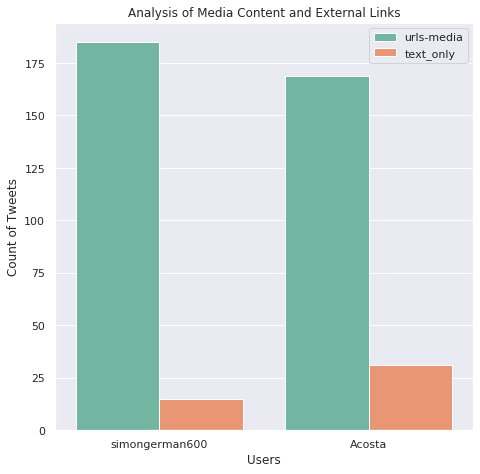

In [8]:
plt.figure(figsize=(7.5,7.5))
sns.set(style="darkgrid")

ax = sns.countplot(x = 'screen_name', hue = 'classification', data = tweets_df_merged, palette="Set2")

plt.xlabel('Users')
plt.ylabel('Count of Tweets')
plt.title('Analysis of Media Content and External Links')
plt.legend(loc='best')

plt.show()

Since @simongerman600 is a geographer and demographer, it is obvious to see less number of tweets with just text but @Acosta being a journalist, it was assumed that he would be live tweeting often and more text tweets was expected which does not seem to be the case.

## Analysis of Hashtags

In this section, we are visualizing the number of hashtags that the users use in their tweets, in the form of a histogram.

Code Reference: https://stackoverflow.com/questions/7526625/matplotlib-global-legend-and-title-aside-subplots; https://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny; https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python; http://www.datasciencemadesimple.com/get-maximum-value-column-python-pandas/; 

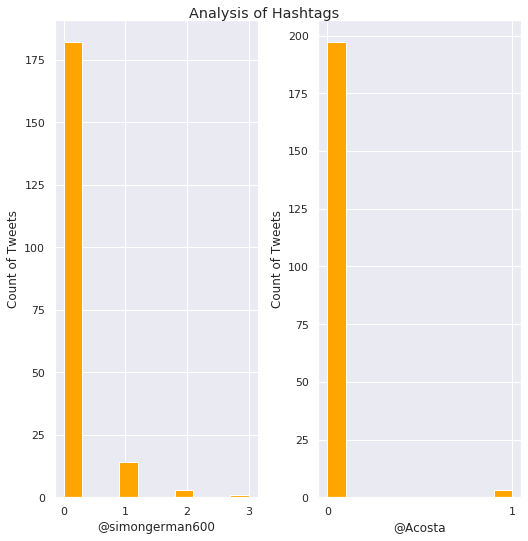

In [9]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(7.5,7.5))
fig.suptitle('Analysis of Hashtags', y=1)

plt.subplot(1,2,1)
plt.hist(tweets_df1['hashtags'], color='orange')
plt.xticks(np.arange(0,(tweets_df1['hashtags'].max())+1))
plt.xlabel('@simongerman600')
plt.ylabel('Count of Tweets')

plt.subplot(1,2,2)
plt.hist(tweets_df2['hashtags'], color='orange')
plt.xticks(np.arange(0,(tweets_df2['hashtags'].max())+1))
plt.xlabel('@Acosta')
plt.ylabel('Count of Tweets')

plt.tight_layout()

Again, it was expected of @simongerman600 to use hashtags for sharing his maps and visualizations but it is suprising to see @Acosta as a journalist is not using hashtags to break news with the trends.

## Log Odds Ratio

In this section, we will determine which words are strongly associated to each user by calculating the log odds ratio for all the words used by both the users.

We will start by transforming the text columns in both dataframes to text strings for text processing - remove links, twitter user handles, punctuations, breaks, stop words and set the string to lower case. The next step would be to split the text strings to words and store them in a list to count the frequency of words.

Code Reference: https://stackoverflow.com/questions/31866304/convert-a-column-in-pandas-to-one-long-string-python-3; https://stackoverflow.com/questions/2304632/regex-for-twitter-username; https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string; https://stackoverflow.com/questions/6797984/how-do-i-lowercase-a-string-in-python; https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python; https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list/2162045; https://stackoverflow.com/questions/20950650/how-to-sort-counter-by-value-python;

In [10]:
import re
import collections
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


def words_df(column):
  
  text_string = column.str.cat(sep=';') # transform the text column to text string
  
  text_string = re.sub('https://t.co/[A-Za-z\\d]+|&amp;','',text_string) # remove links
  text_string = re.sub(r'(^|[^@\w])@(\w{1,15})\b','',text_string) # remove twitter user handles
  text_string = re.sub(r'[^\w\s]','',text_string) # remove punctuations
  text_string = text_string.lower() # transform text string to lower case
  text_string = text_string.replace('\n','') # remove breaks
  text_string = text_string.split() # split text string to words
  
  words_list = [word for word in text_string if word not in stopwords.words('english')] # remove stop words
  
  counter = collections.Counter(words_list)
  counter = sorted(counter.items(), key=lambda pair: pair[1], reverse=True) 
  return(counter)
  # count the frequency of words and then sort and store them in a list along with the words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The lists containing the words and their frequency counts are transformed to dataframes. The words in one dataframe is looked up in the other dataframe for number of occurrences and stored in a column, and vice-versa. The dataframes are then merged one after another and log odds ratio is calculated for all the words using the below formula.

log2 [( # of times a word is used by user1 + 1 / total # of words used by user1 + 1) / (# of times that word is used by user2 + 1 / total # of words used by user2 + 1)]

The merged dataframe is sorted by users and then by log odds ratio in descending order. The top 20 and bottom 20 records in the merged dataframe are put into a new dataframe for visualization.

Code Reference: https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns; https://stackoverflow.com/questions/17141558/how-to-sort-a-dataframe-in-python-pandas-by-two-or-more-columns; https://michaeljsanders.com/2017/04/17/python-vlookup.html;

In [11]:
words1 = words_df(tweets_df1['text'])
words2 = words_df(tweets_df2['text']) 
# create lists of words from both users

words_df1 = pd.DataFrame(words1, columns = ['word', 'user1_count'])
words_df2 = pd.DataFrame(words2, columns = ['word', 'user2_count']) 
# create dataframes out of the lists

words_df1 = pd.merge(words_df1, words_df2, how = 'left', left_on = 'word', right_on = 'word')
words_df2 = pd.merge(words_df2, words_df1.iloc[:,0:2], how = 'left', left_on = 'word', right_on = 'word') 
# lookup the count of word in the other dataframe and vice-versa

words_df1['screen_name'] = 'user1'
words_df2['screen_name'] = 'user2' 
# identify the dataframes with users

words_df1 = words_df1[['screen_name', 'word', 'user1_count', 'user2_count']]
words_df2 = words_df2[['screen_name', 'word', 'user1_count', 'user2_count']] 
# rearrange columns to merge dataframes

words_df_merged = pd.concat([words_df1, words_df2], ignore_index=True)
words_df_merged = words_df_merged.fillna(0)
words_df_merged['log_odds_ratio'] = np.nan 
# merge dataframes; remove NaNs; insert column for calculating log odds ratio

for i in range(0, len(words_df_merged)):

  words_df_merged['log_odds_ratio'][i] = np.log2(((words_df_merged['user1_count'][i] + 1) / (len(words_df1) + 1)) / ((words_df_merged['user2_count'][i] + 1) / (len(words_df2) + 1)))

words_df_merged = words_df_merged.sort_values(['screen_name','log_odds_ratio'], ascending = [True, False])
words_df_merged = words_df_merged.reset_index(drop=True) 
# sort the dataframe and reset the index

words_df_sliced = pd.concat([words_df_merged[:20], words_df_merged[-20:]], ignore_index=True)
# first 20 and bottom 20 records from merged dataframe to new dataframe

print(words_df_sliced.head())
print(words_df_sliced.tail())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


  screen_name        word  user1_count  user2_count  log_odds_ratio
0       user1         map         80.0          1.0        5.325289
1       user1      source         58.0          2.0        4.283120
2       user1  population         13.0          0.0        3.792794
3       user1       shows         63.0          4.0        3.663511
4       user1      europe         11.0          0.0        3.570402
   screen_name       word  user1_count  user2_count  log_odds_ratio
35       user2     trumps          0.0         12.0       -3.715000
36       user2  president          0.0         12.0       -3.715000
37       user2       says          0.0         13.0       -3.821915
38       user2         wh          0.0         32.0       -5.058955
39       user2      trump          0.0         69.0       -6.143844


The below visualization shows the top 20 records in the dataframe which contains words that are strongly associated with @simongerman600 and the bottom 20 records in the dataframe which contains words that are strongly associated with @Acosta.

Code Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html; https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text

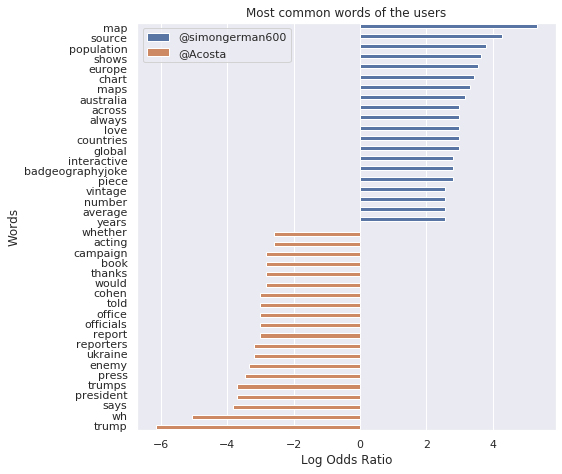

In [12]:
plt.figure(figsize=(7.5,7.5))
sns.set(style="darkgrid")

ax = sns.barplot(x = 'log_odds_ratio', y = 'word', hue = 'screen_name', data = words_df_sliced)

plt.xlabel('Log Odds Ratio')
plt.ylabel('Words')
plt.title('Most common words of the users')

l = plt.legend()
l.get_texts()[0].set_text('@simongerman600')
l.get_texts()[1].set_text('@Acosta')

plt.show()

As expected, the words used by @simongerman600 revolve around maps and visualizations while @Acosta's words are related to the Trump administration.

## Sentiment Analysis

In this section, we will be performing sentiment analysis on tweets from both users using the NLTK Vader module which is tailored to social media. The module outputs scores for positive, neutral and negative sentiments along with a compound score.

https://github.com/cjhutto/vaderSentiment

In [13]:
!pip install twython
!pip install vaderSentiment
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

  Created wheel for twython: filename=twython-3.7.0-cp36-none-any.whl size=31996 sha256=358386e06d539a1b329a41e73f7cdd75f69963caf7b111655c99570bfdec5fb8
  Stored in directory: /root/.cache/pip/wheels/c2/b0/a3/5c4b4b87b8c9e4d99f1494a0b471f0134a74e5fb33d426d009
Successfully built twython
     |████████████████████████████████| 133kB 2.8MB/s 
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


The dataframe columns containing the tweets of users is transformed to lists for running a NLTK vader module on it, producing positive, neutral, negative and compound scores in dictionaries for each tweet.

The compound score is a normalized, weighted composite score which is arrived at by summing and adjusting the valence scores of each word in the lexicon. It is the most useful metric providing a single unidimensional measure of sentiment for a given sentence. The compound scores from the dictionaries of each tweet is taken and averaged for both the users.


Code Reference: https://stackoverflow.com/questions/22341271/get-list-from-pandas-dataframe-column;


In [14]:
analyzer = SentimentIntensityAnalyzer()

text_list1 = tweets_df1['text'].tolist()
text_list2 = tweets_df2['text'].tolist() # columns with tweets to lists

compound1 = []
for sentence in text_list1:
    vs1 = analyzer.polarity_scores(sentence)
    compound1.append(vs1['compound'])
    
compound2 = []
for sentence in text_list2:
    vs2 = analyzer.polarity_scores(sentence)
    compound2.append(vs2['compound']) # append scores to lists
    
print('average compound score1:', sum(compound1)/len(compound1))
print('average compound score2:', sum(compound2)/len(compound2))

average compound score1: 0.23924999999999993
average compound score2: -0.009688000000000004


The average compound score of @simongerman600 is around 0.239 which is well above the benchamrk 0.05 as stated in the NLTK Vader module, indicating that most of his tweets have positive sentiment. Since @simongerman600 is a geographer and demographer, we can assume that most of his tweets will range from neutral to positive sentiment.

The average compund score of @Acosta is around -0.009 indicating that majority of his tweets have neutral sentiments which is suprising considering the tumultous relationship between the Trump administration and media, especially the heated debate between him and President Trump.

## Saving Files

In [0]:
import json

with open('tweets_44468423.json', 'w', encoding='utf-8') as f:
  json.dump(tweets_df_merged['text'].to_json(orient='index'), f, ensure_ascii=False, indent=4)
    
with open('tweets_44468423.csv', 'a') as f:
  tweets_df_merged['text'].to_csv(f, header = True)
  